<a href="https://colab.research.google.com/github/forhigh/deeplearning_undergrad/blob/main/%5Bcomplete%5Dlab_07_4_FieldCompaction_ValidationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab_07_4 Deep Neural Nets
Field Compaction of Open-Graded Aggregates Validation Dataset

환경 준비

In [1]:
from tensorflow.keras.models import Sequential # 전체 라이브러리 중 일부 모듈만 호출
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

데이터 준비, 정규화, Training/Testing 데이터셋 구분

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Data_set = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/FieldCompaction1.csv", delimiter=',', dtype=np.float32)
X = Data_set[:, 0:2]
Y = Data_set[:, 2:5]

# Split dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


딥러닝 모델 구조 설정

In [3]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


모델 컴파일, 실행, 결과 출력

In [4]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=2000, verbose=0, validation_split=0.25) # 0.8 x 0.25 = 0.2 Validation dataset 20% total

score = model.evaluate(X_test, Y_test)
print('Test Loss:', score)

1/1 [==============================] - 1s 738ms/step - loss: 158.7385
Test Loss: 158.73846435546875


변수 history는 model.fit()의 결과가 저장


*   history.params : model.fit()의 설정 값
*   history.epoch : 에포크 정보
*   history.history : loss and accuracy

In [5]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,val_loss
0,5054.889160,5085.409180
1,5048.653809,5078.502930
2,5042.803711,5071.596680
3,5036.289551,5064.682129
4,5030.222656,5057.692383
...,...,...
1995,103.459473,148.096497
1996,103.512634,148.046860
1997,103.502663,147.972137
1998,103.471863,147.830597


검증셋과 학습셋의 오차 변수 지정

In [6]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

학습셋 오차는 파란색, 검증셋 오차는 빨간색으로 에포크에 따른 오차 그래프 작성



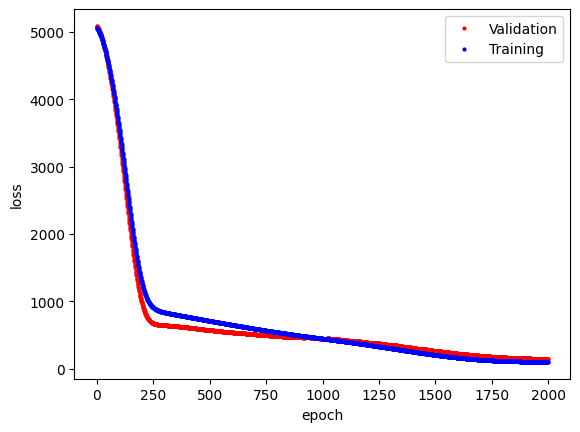

In [7]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()